In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [40]:
data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/05dec18/SalishSea_1h_20181205_20181205_grid_W.nc')

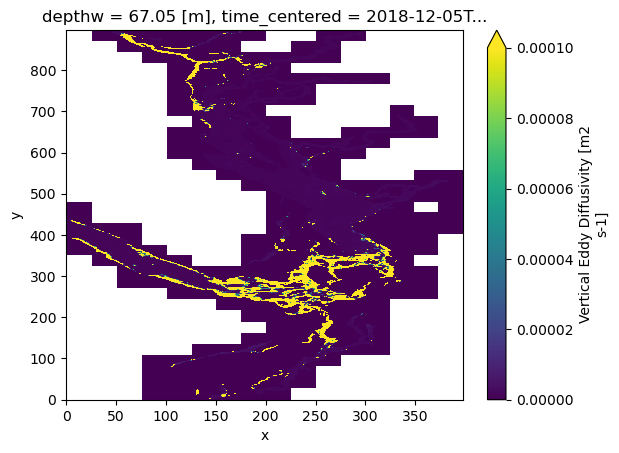

In [5]:
data.vert_eddy_diff[0, 25].plot(vmax=1e-4);

/ocean/sallen/miniconda3/envs/py311_mocsy/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


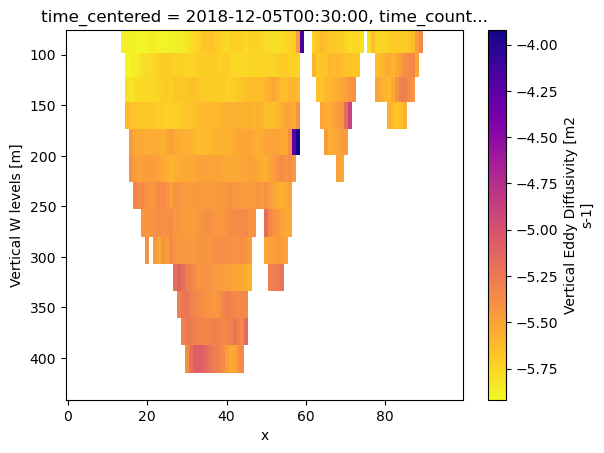

In [23]:
np.log10(data.vert_eddy_diff[0, 26:, 500, 200:300]).plot(y='depthw', yincrease=False, cmap='plasma_r');

/ocean/sallen/miniconda3/envs/py311_mocsy/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


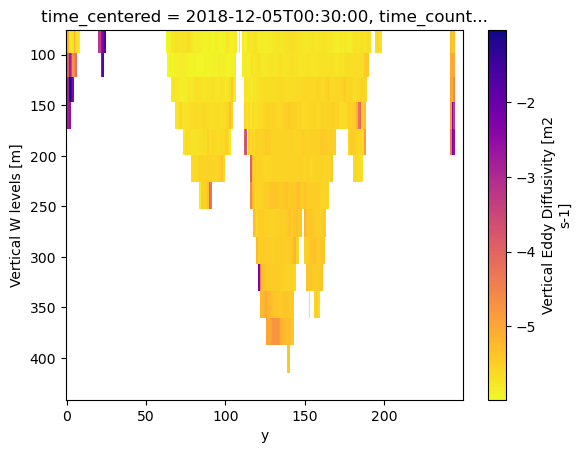

In [22]:
np.log10(data.vert_eddy_diff[0, 26:, 350:600, 250]).plot(y='depthw', yincrease=False, cmap='plasma_r');

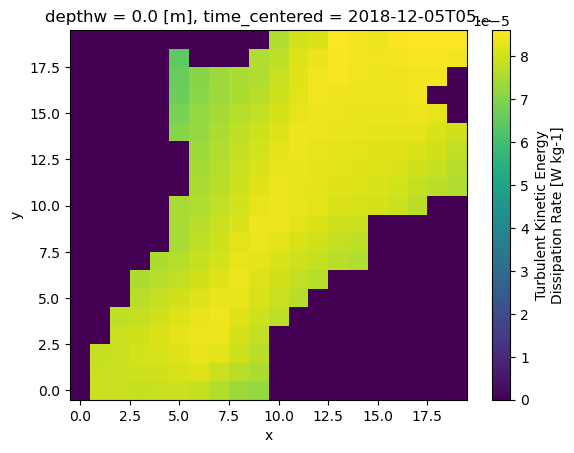

In [35]:
data.dissipation[5, 0, 340:360, 195:215].plot()

239.65305


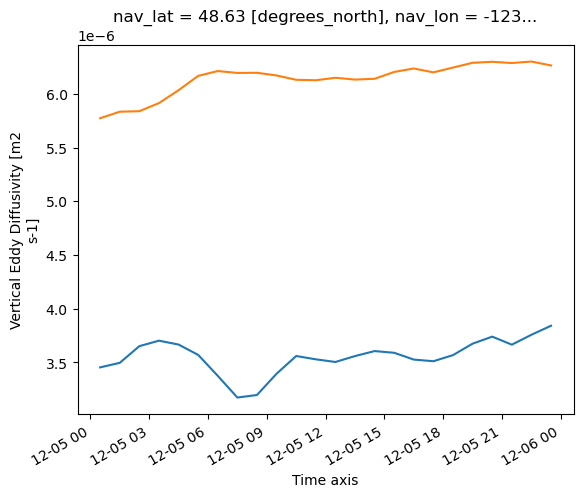

In [36]:
data.vert_eddy_diff[:, 32, 500, 235].plot()
data.vert_eddy_diff[:, 28, 350, 205].plot()
print (data.depthw[32].values)

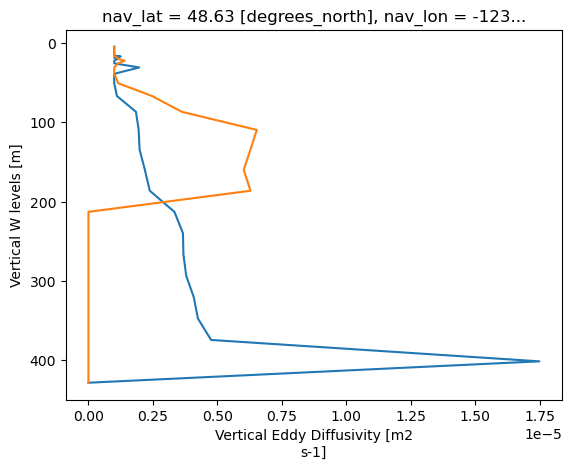

In [40]:
data.vert_eddy_diff[21, 5:, 500, 235].plot(y='depthw', yincrease=False)
data.vert_eddy_diff[21, 5:, 350, 205].plot(y='depthw', yincrease=False)

In [41]:
data2 = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01mar21/SalishSea_1h_20210301_20210301_grid_W.nc')

(0.0, 2e-05)

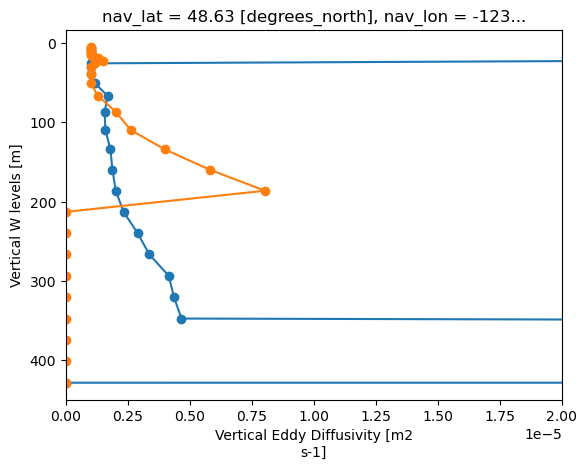

In [50]:
data2.vert_eddy_diff[21, 5:, 500, 235].plot(y='depthw', yincrease=False, marker='o')
data2.vert_eddy_diff[21, 5:, 350, 205].plot(y='depthw', yincrease=False, marker='o')
plt.xlim((0, 2e-5))

In [55]:
profile = xr.open_dataset('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20151201_20151231.nc')

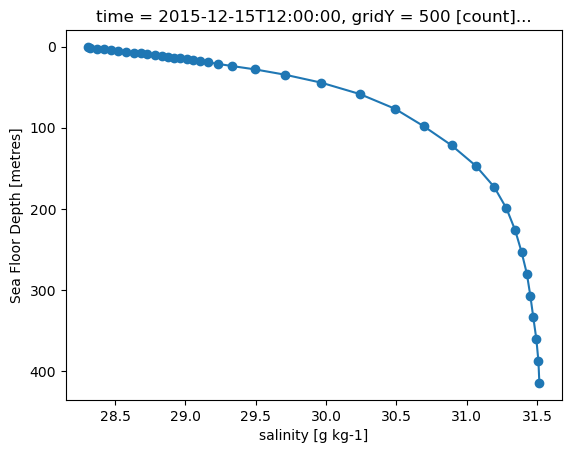

In [58]:
profile.vosaline[0, :-1, 500, 235].plot(y='depth', yincrease=False, marker='o')

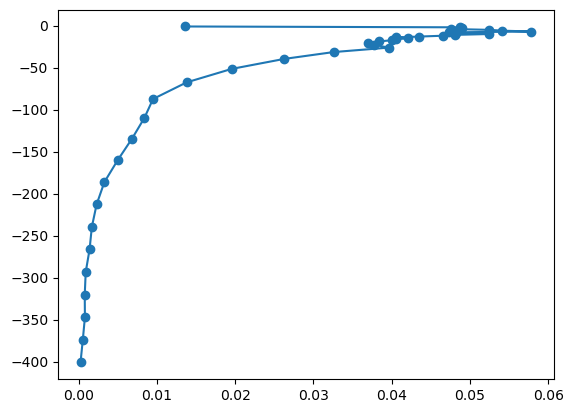

In [75]:
dSdz = (
    (np.array(profile.vosaline[0, 1:-1, 500, 235]) - np.array(profile.vosaline[0, 0:-2, 500, 235])) /
     (np.array(profile.depth[1:-1]) - np.array(profile.depth[0:-2]))
    )
Sdepth = (np.array(profile.depth[1:-1]) + np.array(profile.depth[0:-2]))/2

plt.plot(dSdz, -Sdepth, 'o-')

In [76]:
print(Sdepth[31], dSdz[31])

239.66347 0.0016965698


In [80]:
profile.depth[-2].values

array(414.5341, dtype=float32)

Flux = K * dS/dz
Flux = Z * dS/dt  where Z = profile.depth[-2] - Sdepth[31]
might what to consider hysography say 2/3?

In [84]:
Z = profile.depth[-2].values - Sdepth[31]

In [85]:
Z

174.87062

From Allen et al plot 2 salinity units in 2.5 years OBS

In [282]:
dSdt = 2 / (2.5 * 365 * 86400)
dSdt_obs = dSdt
print (dSdt)
print (dSdt * 86400)

2.536783358701167e-08
0.002191780821917808


In [87]:
Flux2 = Z * 0.67 * dSdt

In [89]:
kappa = Flux2/(dSdz[31])
kappa

0.0017518757088332746

Model 3.2 years and 1 salinity unit

In [283]:
dSdt = 1 / (3.2 * 365 * 86400)
print (dSdt, dSdt_obs/dSdt)
print (dSdt*86400)

9.909309994926434e-09 2.5599999999999996
0.0008561643835616439


In [91]:
Flux2 = Z * 0.67 * dSdt

In [92]:
kappa = Flux2/(dSdz[31])
kappa

0.0006843264487629979

Try as curvature

In [94]:
d2Sdz2 = (
    (np.array(profile.vosaline[0, 2:-1, 500, 235]) -2 *  np.array(profile.vosaline[0, 1:-2, 500, 235]) 
    + np.array(profile.vosaline[0, 0:-3, 500, 235])) /
     (np.array(profile.depth[2:-1]) - np.array(profile.depth[1:-2]) ) /
    (np.array(profile.depth[1:-2]) - np.array(profile.depth[0:-3]) )
    )

In [95]:
kappa = 0.67 * dSdt / d2Sdz2
kappa

array([ 1.8900536e-07,  2.1756050e-05, -4.6538485e-06,  1.3593482e-06,
        3.9076403e-06,  1.7840766e-06, -6.3060543e-07,  7.2348012e-06,
        1.5643386e-06, -1.5895030e-06, -5.0251570e-06, -2.4568469e-06,
       -3.1200088e-06,  2.5878990e-06,  8.5805123e-06,  2.2054794e-06,
        1.8299303e-06,  1.3390137e-06,  1.0861680e-06,  1.2085414e-06,
        3.7910677e-06,  8.7874778e-06,  6.1131963e-05, -7.1796552e-05,
       -5.6799559e-05, -7.6771085e-04, -1.4441001e-04, -1.0336763e-04,
       -1.0629158e-04, -1.8248320e-04, -2.9673174e-04, -6.1932532e-04,
       -3.6370638e-04, -1.4426210e-03,  7.8830374e-03, -6.6188356e-04,
       -6.1315863e-04], dtype=float32)

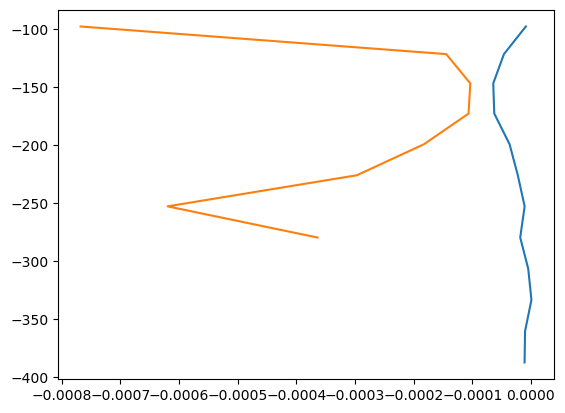

In [103]:
plt.plot(d2Sdz2[25:], -profile.depth[25+1:-2])
plt.plot(kappa[25:-4], -profile.depth[25+1:-4-2])

In [105]:
print (d2Sdz2[30], profile.depth[31].values)

-2.2374545e-05 226.2603


In [109]:
print (dSdt / d2Sdz2[30], profile.depth[31].values)

-0.0004428832029213422 226.2603


In [107]:
dSdt

9.909309994926434e-09

Back to Diffusivity in Model

In [30]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = np.array(mesh.tmask[0])
e3t = mesh.e3t_0[0]

/ocean/sallen/miniconda3/envs/py311_mocsy/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


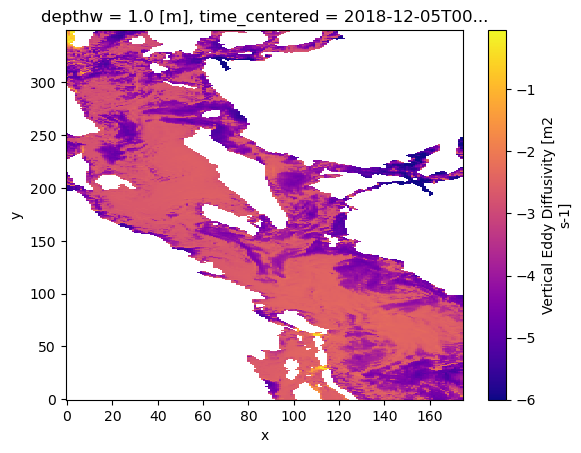

In [117]:
np.log10(data.vert_eddy_diff[0, 1, 400:750, 125:300]).plot(cmap='plasma');

In [144]:
masked_vert_K = np.ma.masked_array(data.vert_eddy_diff[21, :, 400:600, 125:300], mask=1- tmask[:, 400:600, 125:300])

212.89656
0.0004021318017045416


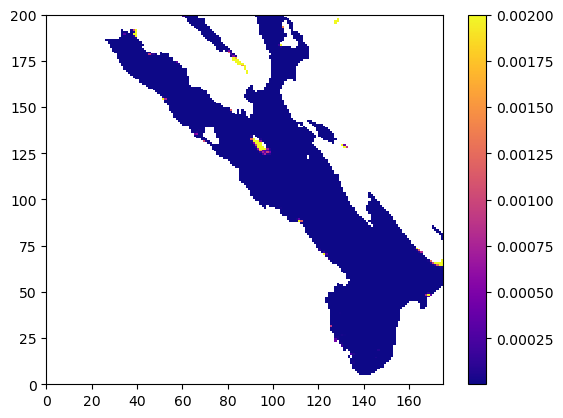

In [151]:
kk = 31
print(data.depthw[kk].values)
colours = plt.pcolormesh((masked_vert_K[kk]), cmap='plasma', vmax=2e-3)
plt.colorbar(colours);
print (masked_vert_K[kk].mean())

In [14]:
print (tmask.shape)
tmaskt = np.repeat(tmask[None,...], 24, axis=0)
print(tmaskt.shape)
masked_vert_Kt = np.ma.masked_array(data.vert_eddy_diff[:, :, 400:600, 125:300], mask=1- tmaskt[:, :, 400:600, 125:300])


(40, 898, 398)
(24, 40, 898, 398)


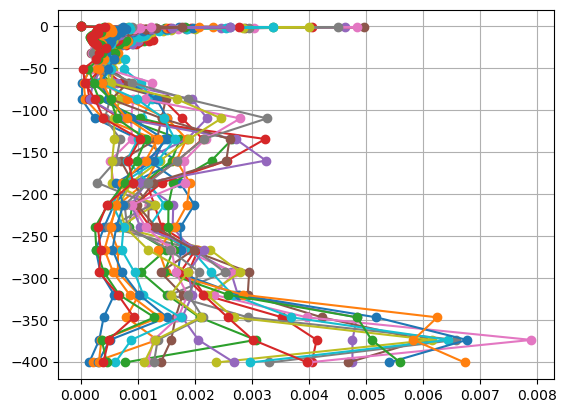

In [168]:
for tt in range(24):
    plt.plot(masked_vert_Kt[tt].mean(axis=1).mean(axis=1), -data.depthw, 'o-')
plt.grid();

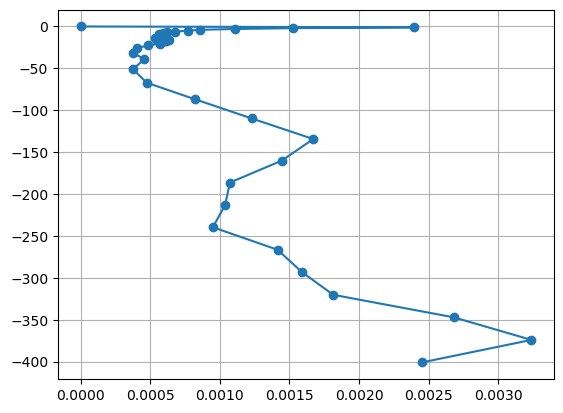

In [169]:
plt.plot(masked_vert_Kt.mean(axis=2).mean(axis=2).mean(axis=0), -data.depthw, 'o-')
plt.grid();

In [11]:
data = xr.open_dataset('/results2/SalishSea/hindcast-blue.single/02dec17/SalishSea_1h_20171202_20171202_grid_W.nc')
double = xr.open_dataset('/results2/SalishSea/hindcast-blue.double/02dec17/SalishSea_1h_20171202_20171202_grid_W.nc')
double

<xarray.Dataset>
Dimensions:               (y: 1796, x: 796, nvertex: 4, depthw: 80,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * depthw                (depthw) float32 0.0 0.5 1.0 1.5 ... 407.6 421.3 435.0
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2017-12-02T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    depthw_bounds         (depthw, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    vert_eddy_diff        (time_counter, depthw, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20171201_20171231_grid_W
    description:  ocean W grid variables
    title:        ocean W grid variables
    Conventions:  CF-1.6
    timeStamp:    2022-Aug-30 05:07:49 GMT
    uuid:         51d53137-ba0b-4cea-bacb-6e9e872792f8

In [77]:
doubmesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask_double_202207j.nc')
dtmask = np.array(doubmesh.tmask[0])
dmaskt = np.repeat(dtmask[None,...], 24, axis=0)

In [17]:
masked_doub_K = np.ma.masked_array(double.vert_eddy_diff[0, :, 400*2:600*2, 125*2:300*2], 
                                   mask=1- dtmask[:, 400*2:600*2, 125*2:300*2])
masked_vert_K = np.ma.masked_array(data.vert_eddy_diff[0, :, 400:600, 125:300], mask=1- tmask[:, 400:600, 125:300])


212.89656
0.00013062518311627525
216.43597
0.00036594689616768896


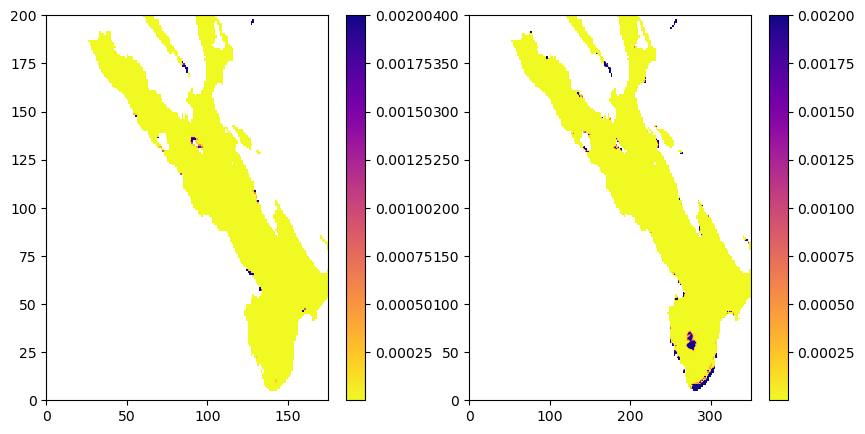

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
kk = 31
print(data.depthw[kk].values)
colours = axs[0].pcolormesh((masked_vert_K[kk]), cmap='plasma_r', vmax=2e-3)
plt.colorbar(colours);
print (masked_vert_K[kk].mean())

kk = 31*2 + 1
print(double.depthw[kk].values)
colours = axs[1].pcolormesh((masked_doub_K[kk]), cmap='plasma_r', vmax=2e-3)
plt.colorbar(colours);
print (masked_doub_K[kk].mean())

In [81]:
masked_doub_K = np.ma.masked_array(double.vert_eddy_diff[:, :, 400*2:600*2, 125*2:300*2], 
                                   mask=1- dmaskt[:, :, 400*2:600*2, 125*2:300*2])
masked_vert_K = np.ma.masked_array(data.vert_eddy_diff[:, :, 400:600, 125:300], mask=1- tmaskt[:, :, 400:600, 125:300])


212.89656
0.001135834730316331
216.43597
0.0015723047304654829


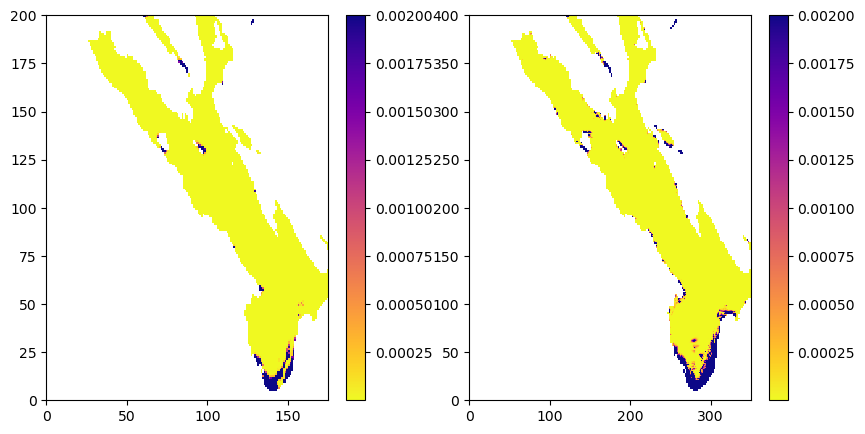

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
kk = 31
print(data.depthw[kk].values)
colours = axs[0].pcolormesh((masked_vert_K[kk]), cmap='plasma_r', vmax=2e-3)
plt.colorbar(colours);
print (masked_vert_K[kk].mean())

kk = 31*2 + 1
print(double.depthw[kk].values)
colours = axs[1].pcolormesh((masked_doub_K[kk]), cmap='plasma_r', vmax=2e-3)
plt.colorbar(colours);
print (masked_doub_K[kk].mean())

0.00038706121688232255
0.0003293092540605628


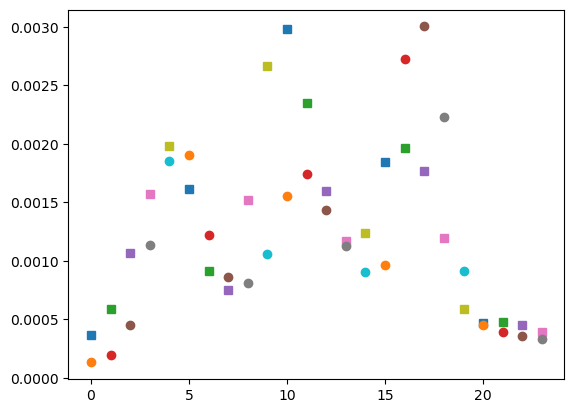

In [25]:
kk = 31
kk2 = 31*2 + 1
for tt in range(24):
    masked_doub_K = np.ma.masked_array(double.vert_eddy_diff[tt, kk2, 400*2:600*2, 125*2:300*2], 
                                   mask=1- dtmask[kk2, 400*2:600*2, 125*2:300*2])
    masked_vert_K = np.ma.masked_array(data.vert_eddy_diff[tt, kk, 400:600, 125:300], mask=1- tmask[kk, 400:600, 125:300])
    plt.plot(tt, masked_doub_K.mean(), 's')
    plt.plot(tt, masked_vert_K.mean(), 'o')
print (np.ma.masked_array(double.vert_eddy_diff[tt, kk2, 400*2:600*2, 125*2:300*2], 
                                   mask=1- dtmask[kk2, 400*2:600*2, 125*2:300*2]).mean())
print (np.ma.masked_array(data.vert_eddy_diff[tt, kk, 400:600, 125:300], mask=1- tmask[kk, 400:600, 125:300]).mean())

50.963238
0.0006254767002572282
51.913795
0.0008199539344874936


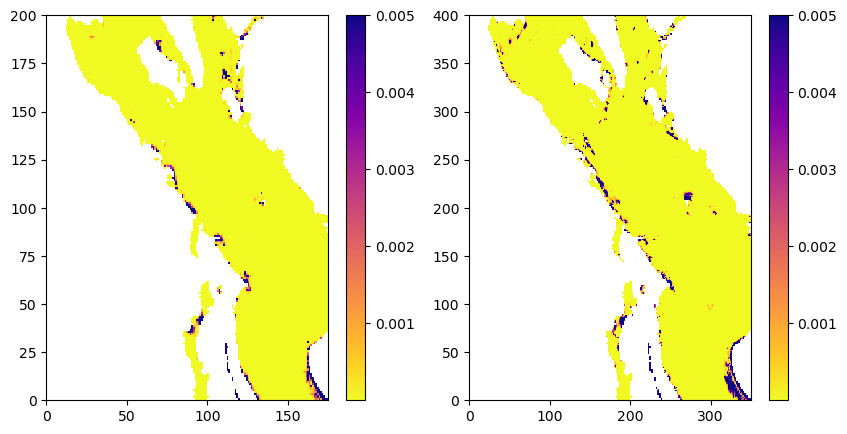

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
kk = 24
print(data.depthw[kk].values)
colours = axs[0].pcolormesh((masked_vert_K[kk]), cmap='plasma_r', vmax=5e-3)
plt.colorbar(colours);
print (masked_vert_K[kk].mean())

kk = 24*2 + 1
print(double.depthw[kk].values)
colours = axs[1].pcolormesh((masked_doub_K[kk]), cmap='plasma_r', vmax=5e-3)
plt.colorbar(colours);
print (masked_doub_K[kk].mean())

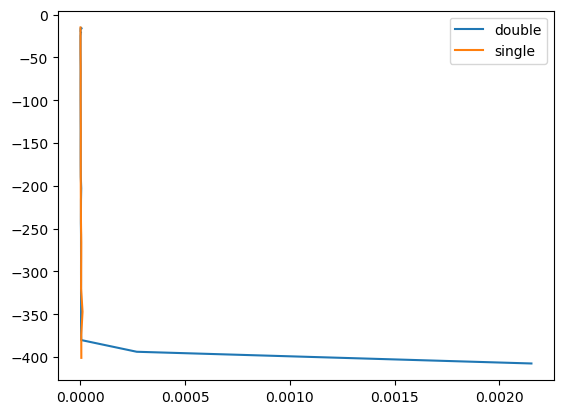

In [65]:
ss = -5
plt.plot(masked_doub_K[31:, 200-2*ss, 190-2*ss], -double.depthw[31:].values, label='double')
plt.plot(masked_vert_K[15:, 100-ss, 95-ss], -data.depthw[15:].values, label='single')
plt.legend();

(95, 11) (95, 11)


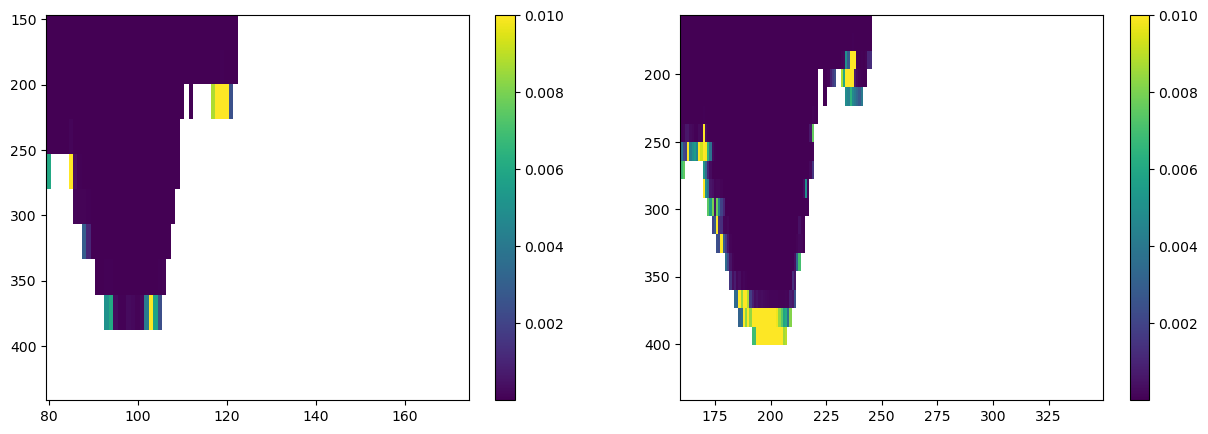

In [113]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
topk = 29
ii = 140
xx, yy = np.meshgrid(  data.depthw[topk:].values,np.arange(80, 175),)
print (xx.shape, masked_vert_K[:, topk:, ii, 80:].mean(axis=0).T.shape)
colours = axs[0].pcolormesh(yy, xx, (masked_vert_K[:, topk:, ii, 80:].mean(axis=0).T), vmax=0.01, shading='nearest')
axs[0].invert_yaxis();
fig.colorbar(colours, ax=axs[0])
xx, yy = np.meshgrid(  double.depthw[topk*2+1:].values,np.arange(80*2, 175*2),)
colours = axs[1].pcolormesh(yy, xx, masked_doub_K[:, topk*2+1:, ii*2, 160:].mean(axis=0).T, vmax=0.01)
fig.colorbar(colours, ax=axs[1])
axs[1].invert_yaxis();

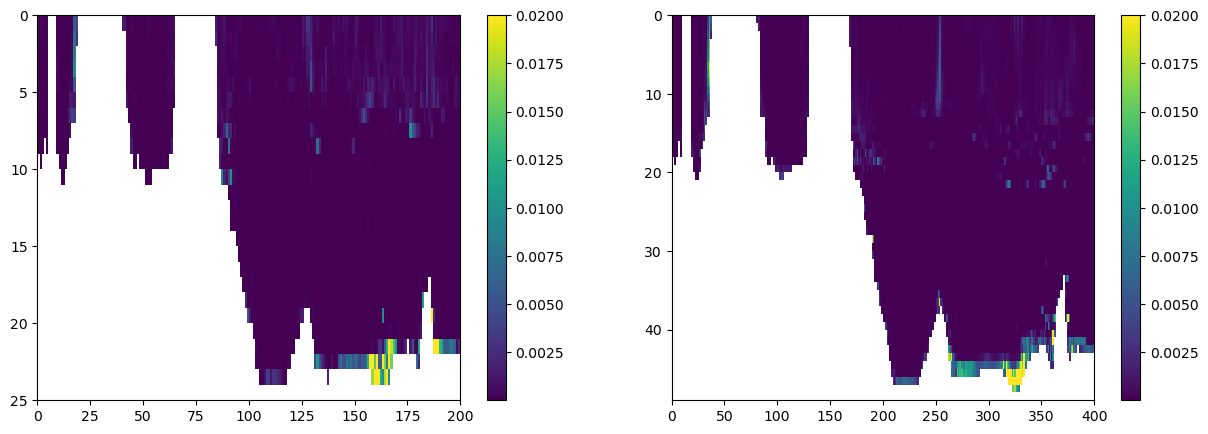

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
colours = axs[0].pcolormesh(masked_vert_K[:, 15:, :, 100].mean(axis=0), vmax=0.02)
axs[0].invert_yaxis();
fig.colorbar(colours, ax=axs[0])
colours = axs[1].pcolormesh(masked_doub_K[:, 15*2+1:, :, 200].mean(axis=0), vmax=0.02)
fig.colorbar(colours, ax=axs[1])
axs[1].invert_yaxis();

Okay, but not convincing.  Look at the salinity decrease instead.

# ZDFTMX: NEMO #

In [1]:
# Laurent Vertical Function
# exp(-(H+z)/h_o  over ho(1-exp(-H/ho))

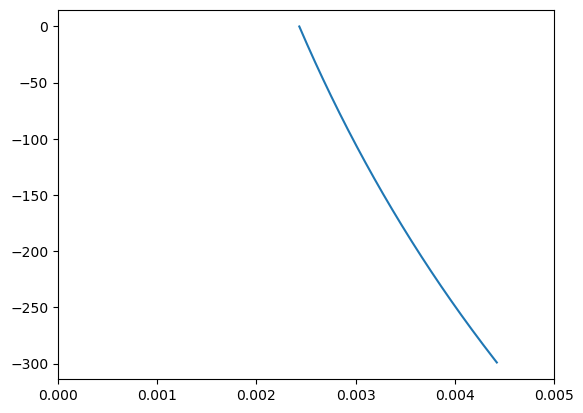

In [249]:
ho = 500 # typical value from pg 211
H = 300 # depth of water
z = -np.arange(H)
fig, ax = plt.subplots(1, 1)
ax.plot(np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho)), z);
ax.set_xlim(0, 0.005);

/tmp/ipykernel_20117/186776635.py:8: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
/tmp/ipykernel_20117/186776635.py:9: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);
/tmp/ipykernel_20117/186776635.py:14: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
/tmp/ipykernel_20117/186776635.py:15: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);
/tmp/ipykernel_20117/186776635.py:20: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
/tmp/ipykernel_20117/186776635.py:21: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);


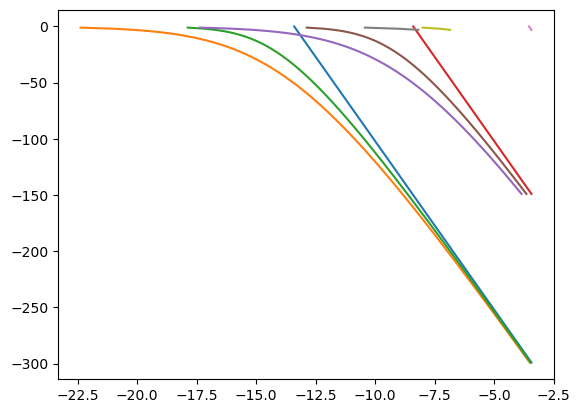

In [260]:
ho = 30 # based on analysis below
H = 300 # depth of water
z = -np.arange(H)
fig, ax = plt.subplots(1, 1)
ax.plot(np.log(np.exp(-(H+z)/ho)/ho), z);
scale = 3*ho
damp = (1-np.exp(z/scale))
ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);
H = 150
z = -np.arange(H)
ax.plot(np.log(np.exp(-(H+z)/ho)/ho), z);
damp = (1-np.exp(z/scale))
ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);
H = 4
z = -np.arange(H)
ax.plot(np.log(np.exp(-(H+z)/ho)/ho), z);
damp = (1-np.exp(z/scale))
ax.plot(np.log(damp**2*np.exp(-(H+z)/ho)/ho/(1-np.exp(-H/ho))), z);
ax.plot(np.log(damp*np.exp(-(H+z)/ho)/ho), z);


In [251]:
# Polzin 2009

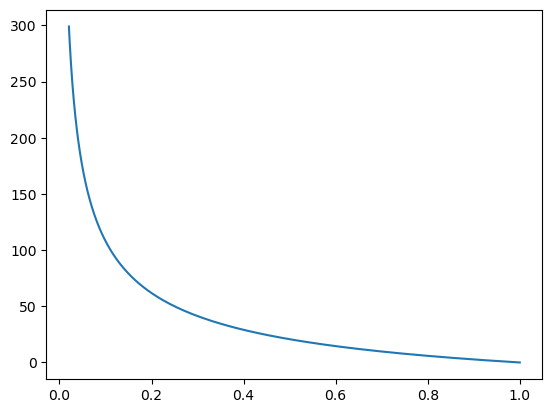

In [262]:
H = 300 # depth of water
z = -np.arange(H)
# epsilon = eo/(1+z/zo)**2
zo = 50
fig, ax = plt.subplots(1, 1)
ax.plot(1/(1-z/zo)**2, -z)

In [253]:
# 1/zo = 2 A alpha beta(omega) N-2 b mo^4

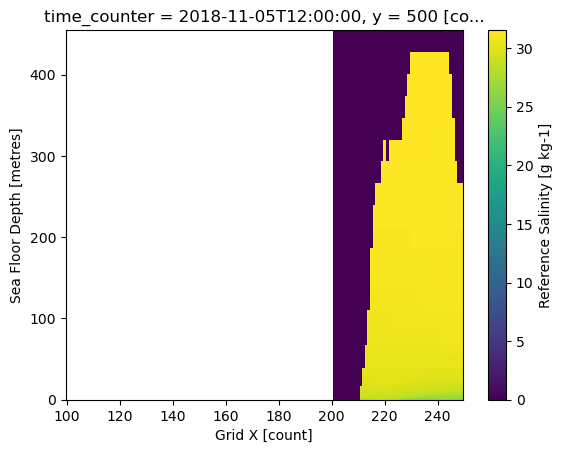

In [263]:
TS = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/05nov18/SalishSea_1d_20181105_20181105_grid_T.nc')
TS.vosaline[0, :, 500, 100:250].plot();
yy = 500
xx = 235

4.746151893776074e-06 401.06845


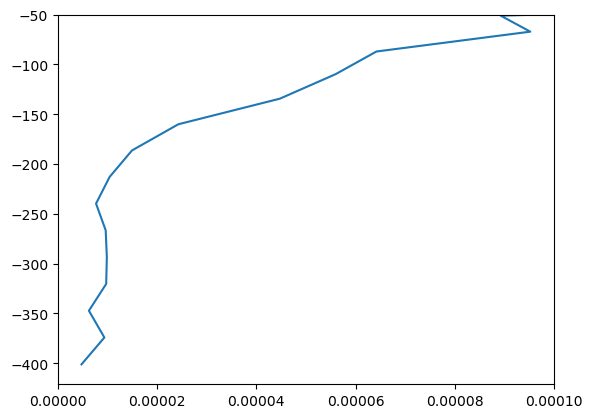

In [264]:
#TS.vosaline[0, :35, 500, 250].plot()
#TS.votemper[0, :35, 500, 250].plot()
zz = 39
g = 9.8
fig, ax = plt.subplots(1, 1)
N2 = (-g*(np.array(TS.sigma_theta[0, :zz-1, yy, xx]) - np.array(TS.sigma_theta[0, 1:zz, yy, xx]))/
        e3t[:zz-1, yy, xx] / 1024)
ax.plot(N2, -data.depthw[1:zz])
ax.set_ylim(None, -50);
ax.set_xlim(0, 0.0001);
print (N2[-1].values, data.depthw[39-1].values)

In [256]:
f = 1e-4
omega = 2*np.pi/(12.4*3600)
# print(Sdepth[31], dSdz[31])  density 23.7 at 150 m, 23.9 at 200 m
N = 5e-5

In [257]:
beta = (omega**2 + f**2)*N/(omega*((omega**2 - f**2) * (N**2 -omega**2))**0.5)
beta

(4.9756457274639076e-17-0.8125846131191699j)

Not helpful.  Moving to equations (5) and (6) in https://www.sciencedirect.com/science/article/pii/S1463500309001565?casa_token=4MNVwn-vId4AAAAA:rYBf0DPVxjoRfRG2SdVFB53WqRf2wsrH8mfVb10CjxILDh3BteFfORKCrXXVlLVi8g_CpFe1FV4 

We see zstar = int_0^z of N2/N2(z=0) dz and then
epsilon = epsilon_0 N2/N2(0)/ (1 + zstar/zo)

Using N2 above we calculate zstar

(38,)


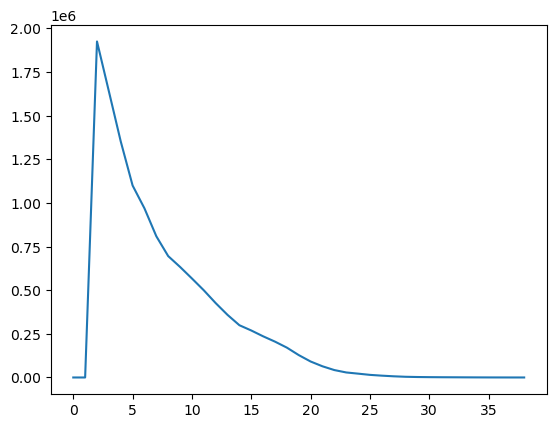

In [265]:
print (N2.shape)
zstar = np.zeros((zz))
zstar[zz-1] = data.depthw[zz] - data.depthw[zz-1] 
for kk in range(zz-2, 1, -1):
    zstar[kk] = zstar[kk+1] + N2[kk] * (data.depthw[zz-1] - data.depthw[kk]) /N2[-1]
fig, ax = plt.subplots(1, 1)
ax.plot(zstar)

In [278]:
eo = N2[-1].values
zo = 50
KPolzin = eo / N2[-1].values / (1 + zstar/zo)**2
KPolzin[-1]

0.4224069488141431

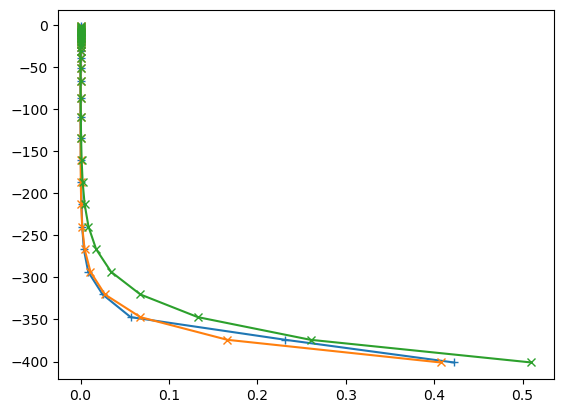

In [281]:
fig, ax = plt.subplots(1, 1)
dw = np.array(data.depthw)
ax.plot((KPolzin[2:]), -dw[2:39], '-+')
ho = 30
ax.plot(np.exp((-428+dw[2:39])/ho), -dw[2:39], '-x');
ho = 40
ax.plot(np.exp((-428+dw[2:39])/ho), -dw[2:39], '-x');

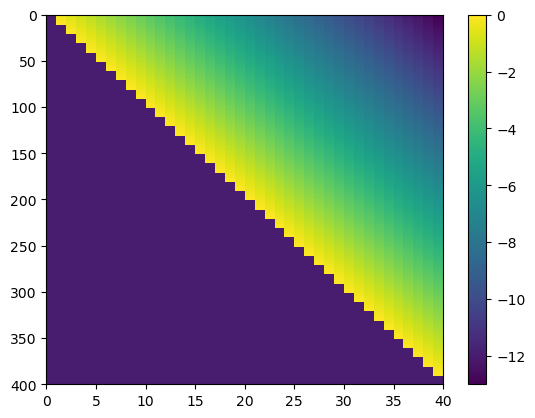

In [225]:
ho = 30 # based on analysis above
xs = np.arange(40)
maxH = 400
H = maxH * xs / 40 # depth of water
zs = -np.arange(maxH)
xx, zz = np.meshgrid(xs, zs)
fig, ax = plt.subplots(1, 1)
kappa = np.log(np.exp(-(H+zz)/ho))
kappa[-zz > H] = -12
colors = ax.pcolormesh(kappa);
ax.invert_yaxis()
fig.colorbar(colors);


1.9063263879222708e-07


/tmp/ipykernel_20117/1314247966.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(kappa_limit))
/tmp/ipykernel_20117/1314247966.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(kappa_limit))


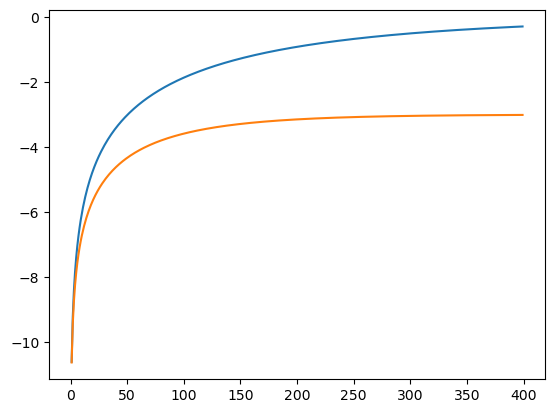

In [244]:
kappa_limit = (1 - np.exp(zs/200))**2
plt.plot(np.log(kappa_limit))
kappa_limit = 1e-3*(1 - np.exp(zs/80))**4
plt.plot(np.log10(kappa_limit))
print (kappa_limit[10])

/tmp/ipykernel_20117/2999715094.py:12: RuntimeWarning: divide by zero encountered in log10
  kappa = np.log10(kappa)


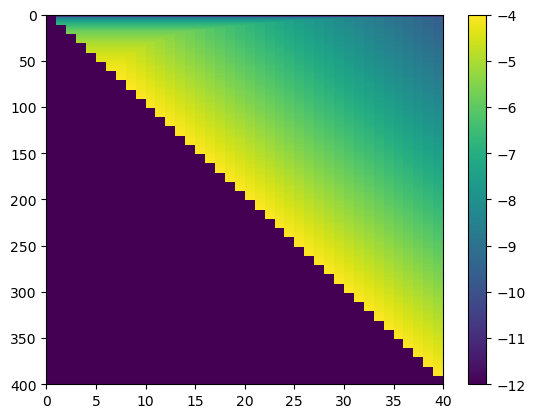

In [245]:
ho = 30 # based on analysis below
xs = np.arange(40)
maxH = 400
H = maxH * xs / 40 # depth of water
zs = -np.arange(maxH)
xx, zz = np.meshgrid(xs, zs)
fig, ax = plt.subplots(1, 1)
kappa = 1e-4*np.exp(-(H+zz)/ho)
for ii in range(40):
    for jj in range(400):
        kappa[jj, ii] = min(kappa_limit[jj], kappa[jj, ii]) 
kappa = np.log10(kappa)
kappa[-zz > H] = -12
colors = ax.pcolormesh(kappa);
ax.invert_yaxis()
fig.colorbar(colors);

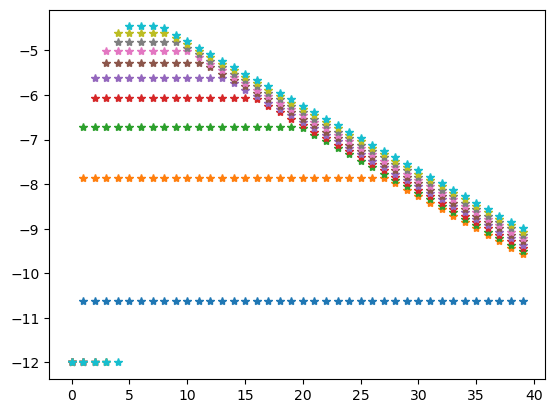

In [246]:
plt.plot(kappa[1], '*')
plt.plot(kappa[5], '*')
plt.plot(kappa[10], '*')
plt.plot(kappa[15], '*')
plt.plot(kappa[20], '*')
plt.plot(kappa[25], '*')
plt.plot(kappa[30], '*')
plt.plot(kappa[35], '*')
plt.plot(kappa[40], '*')
plt.plot(kappa[45], '*')


In [218]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')

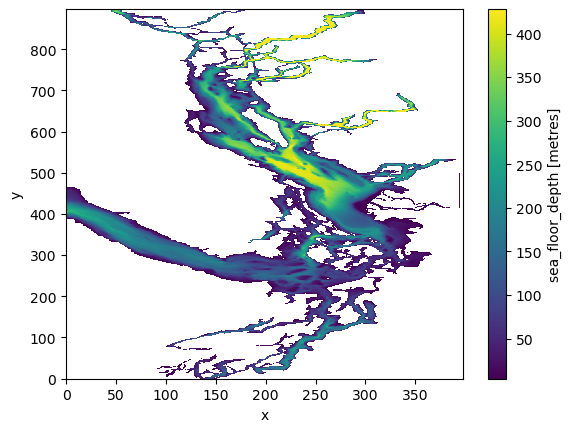

In [219]:
bathy.Bathymetry.plot()

/tmp/ipykernel_20117/1604716079.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.pcolormesh(np.exp(-(H + zz)/ho)/(1-np.exp(-H/ho))*ho)


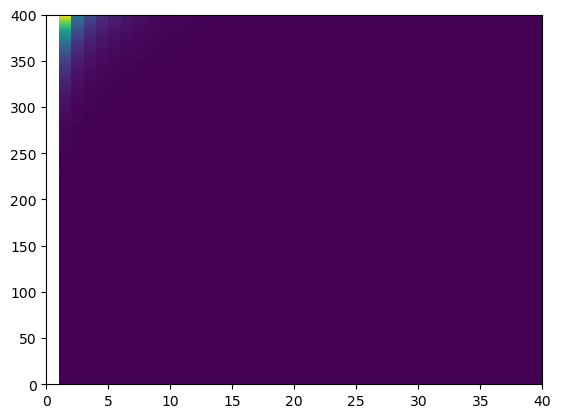

In [223]:
plt.pcolormesh(np.exp(-(H + zz)/ho)/(1-np.exp(-H/ho))*ho)